# Visualizing data with streamgraphs in Python

[Streamgraphs](http://leebyron.com/streamgraph/) are a visualization technique isn't used too often, but people get _really_ excited when they see it. It's a stacked area graph that's centered vertically, and comes with a handful of pros and cons. Let's reproduce the streamgraphs from [this Bloomberg piece](https://www.bloomberg.com/graphics/2020-democratic-presidential-candidate-policies/).

<p class="reading-options">
  <a class="btn" href="/bloomberg-tweet-topics/building-streamgraphs-from-candidate-tweets">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/bloomberg-tweet-topics/notebooks/Building streamgraphs from candidate tweets.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/bloomberg-tweet-topics/notebooks/Building streamgraphs from candidate tweets.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **tweets-categorized.csv:** categorized tweets - Approximately 39k tweets from Democratic presidential candidates, labeled and categorized


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/bloomberg-tweet-topics/data/tweets-categorized.csv -P data

## Building the streamgraph

The real fun part of [the piece from Bloomberg](https://www.bloomberg.com/graphics/2020-democratic-presidential-candidate-policies/) is definitely the visualizations. Streamgraphs are when you take boring old stacked area charts and _center them vertically!_

Here's our target:

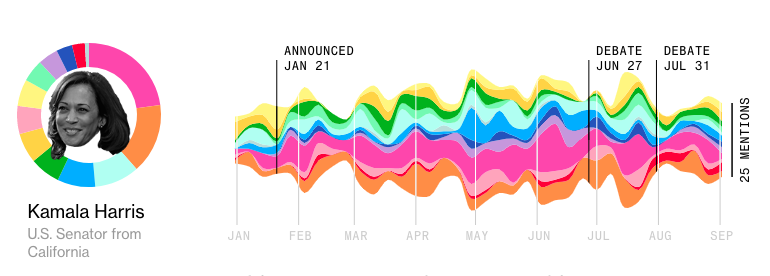

Let's do a little importing before we get too far in.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Make our graphics a little prettier
plt.style.use('ggplot')

## Our data

We're going to start with our labeled tweet dataset from the last section.

In [1]:
df = pd.read_csv("data/tweets-categorized.csv")
df.head(5)

,username,text,date,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
0,KamalaHarris,Keeping the Midland and Odessa community and t...,2019-08-31 23:22:40+00:00,0,0,0,0,0,0,0,0,0,0,0
1,KamalaHarris,Today is the last day to give before our criti...,2019-08-31 21:35:00+00:00,0,0,0,0,0,0,0,0,0,0,0
2,KamalaHarris,Brazil's President Bolsonaro’s fanning the fla...,2019-08-31 19:34:00+00:00,0,0,0,0,0,0,0,0,0,0,0
3,KamalaHarris,Investing in our nation’s teachers shouldn’t b...,2019-08-31 17:42:00+00:00,0,0,0,1,0,0,0,0,0,0,0
4,KamalaHarris,To everyone in the path of Hurricane Dorian: N...,2019-08-31 16:02:00+00:00,0,0,0,0,0,0,0,0,0,0,0


### Converting strings to dates

We're going to be plotting these based on the week (or 8 days or 2 days or whatever), so we'll need to **convert our date column to an actual date**. Right now our "date" columns is just a string. 

In [3]:
df.dtypes

username          object
text              object
date              object
climate_change     int64
drugs              int64
economy            int64
education          int64
foreign_policy     int64
gun_control        int64
health             int64
immigration        int64
jobs               int64
military           int64
repro_rights       int64
dtype: object

When your date is an `object` you usually have to wrangle it around with `pd.to_datetime` to make things work. Magically enough you usually get to just say "hey, convert this to a datetime" and it works _automatically_.

In [4]:
# Convert the date to a datetime, then pull out the week
df['date'] = pd.to_datetime(df.date)
df.head(2)

,username,text,date,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
0,KamalaHarris,Keeping the Midland and Odessa community and t...,2019-08-31 23:22:40+00:00,0,0,0,0,0,0,0,0,0,0,0
1,KamalaHarris,Today is the last day to give before our criti...,2019-08-31 21:35:00+00:00,0,0,0,0,0,0,0,0,0,0,0


Did it really work?

In [5]:
df.dtypes

username                       object
text                           object
date              datetime64[ns, UTC]
climate_change                  int64
drugs                           int64
economy                         int64
education                       int64
foreign_policy                  int64
gun_control                     int64
health                          int64
immigration                     int64
jobs                            int64
military                        int64
repro_rights                    int64
dtype: object

We now see that it's a `datetime64[ns, UTC]`, which means we can do things like pull out the day of the year or the month or the week or all sorts of magic! Instead of that, though, we're going to **group our data by each week.**

## Grouping by dates with resampling

Grouping by time is calling **resampling**, and it's remarkably easy! We're going to pull out Kamala Harris's tweets, and then tell it to resample by 8-day chunks using the `date` column.

> Why 10? We need to be able to divide easily later, sorry.

In [6]:
# Resample and make it sum every 7 days
harris = df[df.username == 'KamalaHarris'].resample('8D', on='date').sum()
harris.head()

,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
date,,,,,,,,,,,
2019-01-01 00:00:00+00:00,3,1,5,2,0,1,6,4,5,0,0
2019-01-09 00:00:00+00:00,1,4,1,4,0,2,6,3,2,1,0
2019-01-17 00:00:00+00:00,1,0,1,7,0,1,5,7,7,0,1
2019-01-25 00:00:00+00:00,2,1,6,5,0,4,9,5,5,0,1
2019-02-02 00:00:00+00:00,2,3,5,4,1,3,5,6,3,1,2


We can plot a normal stacked area chart with that...

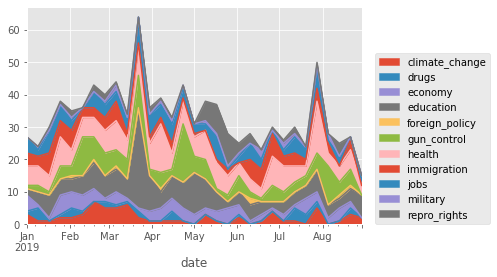

In [7]:
ax = harris.plot(kind='area', stacked=True)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

## Streamgraphs with resampled data

But we came here for streamgraphs, right? Those magic centered ones? Pandas can't do those by itself, so we'll have to peer into the abyss of matplotlib directly.

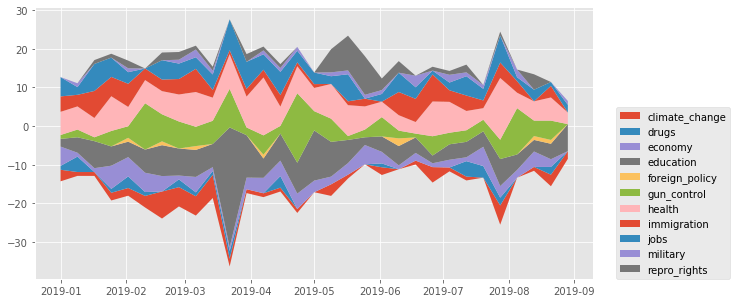

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(harris.index, harris.T, baseline='wiggle', labels=harris.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

You want to smooth out those tragically sharp points? Fine, but it involves **inventing fake data.**

## Interpolating to smooth our streamgraph

We can't just say, "draw smooth lines!" Matplotlib needs actual data. It's very sharp because **right now the data is only every eight days**, and each one can be a very sharp jump to the next.

In [9]:
harris.head()

,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
date,,,,,,,,,,,
2019-01-01 00:00:00+00:00,3,1,5,2,0,1,6,4,5,0,0
2019-01-09 00:00:00+00:00,1,4,1,4,0,2,6,3,2,1,0
2019-01-17 00:00:00+00:00,1,0,1,7,0,1,5,7,7,0,1
2019-01-25 00:00:00+00:00,2,1,6,5,0,4,9,5,5,0,1
2019-02-02 00:00:00+00:00,2,3,5,4,1,3,5,6,3,1,2


What we're going to do is pretend we have data **every two days**. But instead of pretend, we're going to **tell pandas to create this fake data**.

First we'll make a list of all of the days we _want_ to exist.

In [10]:
# Make a list of dates between the first and last 
first = harris.index.min()
last = harris.index.max()

# Go between the first and the last in 2-day chunks
frequency = pd.date_range(start=first, end=last, freq='2D')
frequency[:10]

DatetimeIndex(['2019-01-01 00:00:00+00:00', '2019-01-03 00:00:00+00:00',
               '2019-01-05 00:00:00+00:00', '2019-01-07 00:00:00+00:00',
               '2019-01-09 00:00:00+00:00', '2019-01-11 00:00:00+00:00',
               '2019-01-13 00:00:00+00:00', '2019-01-15 00:00:00+00:00',
               '2019-01-17 00:00:00+00:00', '2019-01-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='2D')

Now we're going to add them to our dataframe. The data will be missing when we add the new rows, because pandas sure isn't going to _guess_ what should go there.

In [11]:
# Reindex our dataframe, adding a bunch of new days, but missing data!
smooth = harris.reindex(frequency)
smooth.head(6)

,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
2019-01-01 00:00:00+00:00,3.0,1.0,5.0,2.0,0.0,1.0,6.0,4.0,5.0,0.0,0.0
2019-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09 00:00:00+00:00,1.0,4.0,1.0,4.0,0.0,2.0,6.0,3.0,2.0,1.0,0.0
2019-01-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's fill that data in through **interpolation**. We'll tell it to use quadratic interpolation to make it nice and smooth.

> I'm putting this all in one cell so you can cut and paste more easily

In [12]:
# Plan out 2-day chunks between the first and last days
first = harris.index.min()
last = harris.index.max()
frequency = pd.date_range(start=first, end=last, freq='2D')

# Inject the new (empty) rows, then interpolate new data
smoothed = harris.reindex(frequency).interpolate(method='quadratic')
smoothed.head()

,climate_change,drugs,economy,education,foreign_policy,gun_control,health,immigration,jobs,military,repro_rights
2019-01-01 00:00:00+00:00,3.000000,1.000000,5.000000,2.000000,0.000000,1.000000,6.000000,4.000000,5.000000,0.000000,0.000000
2019-01-03 00:00:00+00:00,2.302575,2.607579,3.674880,2.294317,-0.004572,1.564950,6.232804,3.075563,3.237994,0.484092,-0.133987
2019-01-05 00:00:00+00:00,1.736766,3.643438,2.566507,2.725757,-0.006097,1.919933,6.310405,2.600751,2.150659,0.812123,-0.178649
2019-01-07 00:00:00+00:00,1.302575,4.107579,1.674880,3.294317,-0.004572,2.064950,6.232804,2.575563,1.737994,0.984092,-0.133987
2019-01-09 00:00:00+00:00,1.000000,4.000000,1.000000,4.000000,0.000000,2.000000,6.000000,3.000000,2.000000,1.000000,0.000000


And now **graph it!**

Text(0.5, 1.0, 'Kamala Harris twitter topics')

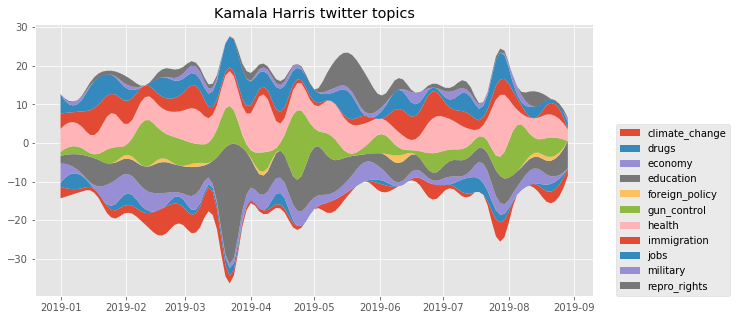

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(smoothed.index, smoothed.T,
             baseline='wiggle', labels=smoothed.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

# Set the title
ax.set_title("Kamala Harris twitter topics")

There we go, nice and smooth.

## Review

TODO

## Discussion topics

TODO